![PPGI_UFRJ](imagens/ppgi-ufrj.png)
# Fundamentos de Ciência de Dados

---
# PPGI/UFRJ 2020.3, 2022.2, 2024.2
## Prof Sergio Serra e Jorge Zavaleta

---
# Data Provenance em Python
## Adding Provenance to an Example

## Provenance: An Introduction to PROV
### Luc Moreau and Paul Groth
### http://www.provbook.org/

## 1- Installation of PROV Library

To install the prov library using pip with support for graphical exports:
--> Use Anaconda prompt command window and type 

>```pip install prov``` ou ```conda install conda-forge::prov```

Step-by-Step to add PROV on Python Source

In [1]:
#Import ProvDocument to you Python Code
from prov.model import ProvDocument

In [2]:
# Create a new provenance document
d1 = ProvDocument()  # d1 is now an empty provenance document

In [3]:
# Declaring namespaces for various prefixes used in the example
d1.add_namespace('now', 'http://www.provbook.org/nownews/')
d1.add_namespace('nowpeople', 'http://www.provbook.org/nownews/people/')
d1.add_namespace('bk', 'http://www.provbook.org/ns/#')

<Namespace: bk {http://www.provbook.org/ns/#}>

In [4]:
# Adding an Entity: now:employment-article-v1.html
e1 = d1.entity('now:employment-article-v1.html')
# Adding an Agent: nowpeople:Bob
d1.agent('nowpeople:Zavaleta')

<ProvAgent: nowpeople:Zavaleta>

In [5]:
# Attributing the article to the agent
d1.wasAttributedTo(e1, 'nowpeople:Zavaleta')

<ProvAttribution: (now:employment-article-v1.html, nowpeople:Zavaleta)>

In [6]:
# Printing what we have so far (serialized in PROV-N)
print(d1.get_provn())

document
  prefix now <http://www.provbook.org/nownews/>
  prefix nowpeople <http://www.provbook.org/nownews/people/>
  prefix bk <http://www.provbook.org/ns/#>
  
  entity(now:employment-article-v1.html)
  agent(nowpeople:Zavaleta)
  wasAttributedTo(now:employment-article-v1.html, nowpeople:Zavaleta)
endDocument


In [7]:
# Adding more namespace declarations
d1.add_namespace('govftp', 'ftp://ftp.bls.gov/pub/special.requests/oes/')
d1.add_namespace('void', 'http://vocab.deri.ie/void#')

# Connecting entitites
# 'now:employment-article-v1.html' was derived from at dataset at govftp
d1.entity('govftp:oesm11st.zip', {'prov:label': 'employment-stats-2011', 'prov:type': 'void:Dataset'})
d1.wasDerivedFrom('now:employment-article-v1.html', 'govftp:oesm11st.zip')

<ProvDerivation: (now:employment-article-v1.html, govftp:oesm11st.zip)>

In [8]:
# Printing what we have so far
print(d1.get_provn())

document
  prefix now <http://www.provbook.org/nownews/>
  prefix nowpeople <http://www.provbook.org/nownews/people/>
  prefix bk <http://www.provbook.org/ns/#>
  prefix govftp <ftp://ftp.bls.gov/pub/special.requests/oes/>
  prefix void <http://vocab.deri.ie/void#>
  
  entity(now:employment-article-v1.html)
  agent(nowpeople:Zavaleta)
  wasAttributedTo(now:employment-article-v1.html, nowpeople:Zavaleta)
  entity(govftp:oesm11st.zip, [prov:label="employment-stats-2011", prov:type="void:Dataset"])
  wasDerivedFrom(now:employment-article-v1.html, govftp:oesm11st.zip, -, -, -)
endDocument


In [9]:
# Adding an activity
d1.add_namespace('is', 'http://www.provbook.org/nownews/is/#')
d1.activity('is:writeArticle')

<ProvActivity: is:writeArticle>

In [10]:
# Adding new relations- Usage and Generation
d1.used('is:writeArticle', 'govftp:oesm11st.zip')
d1.wasGeneratedBy('now:employment-article-v1.html', 'is:writeArticle')

<ProvGeneration: (now:employment-article-v1.html, is:writeArticle)>

# 2 - Graphics export (PNG and PDF)

## Installation of visualization libraries
> Use Anaconda prompt command window and type 
>1. ```conda install -c anaconda pydot ```
>2. ```conda install -c anaconda graphviz```

In [11]:
# conda install graphviz - CMD
# visualize the graph

# Generating the provenance graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('imagens/article-prov2024.png')

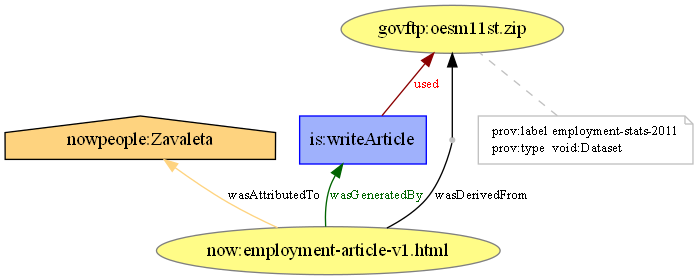

In [12]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image('imagens/article-prov2024.png')

**Installation of PDF libraries**
--> **Use Anaconda prompt command window and type**

```conda install -c conda-forge pydotplus ```

In [13]:
# conda install -c conda-forge pydotplus
# Or save to a PDF
dot.write_pdf('pdf/article-prov2024.pdf')

# 3- Serializaning and Exporting the Data Provenance as PROV-JSON 



In [14]:
# Serializaning Provenance as JSON and showing in the Jupyter notebook
print(d1.serialize(indent=2))

{
  "prefix": {
    "now": "http://www.provbook.org/nownews/",
    "nowpeople": "http://www.provbook.org/nownews/people/",
    "bk": "http://www.provbook.org/ns/#",
    "govftp": "ftp://ftp.bls.gov/pub/special.requests/oes/",
    "void": "http://vocab.deri.ie/void#",
    "is": "http://www.provbook.org/nownews/is/#"
  },
  "entity": {
    "now:employment-article-v1.html": {},
    "govftp:oesm11st.zip": {
      "prov:label": "employment-stats-2011",
      "prov:type": "void:Dataset"
    }
  },
  "agent": {
    "nowpeople:Zavaleta": {}
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "now:employment-article-v1.html",
      "prov:agent": "nowpeople:Zavaleta"
    }
  },
  "wasDerivedFrom": {
    "_:id2": {
      "prov:generatedEntity": "now:employment-article-v1.html",
      "prov:usedEntity": "govftp:oesm11st.zip"
    }
  },
  "activity": {
    "is:writeArticle": {}
  },
  "used": {
    "_:id3": {
      "prov:activity": "is:writeArticle",
      "prov:entity": "govftp:oesm11s

In [15]:
# Serializaning Provenance as JSON and saving as a JSON file
d1.serialize('data/article-prov2024.json')

# 4- XML and Turtle (RDF) Support
## Serializaning and Exporting the Data Provenance as XML and Turtle

In [16]:
# Serializaning Provenance as XML and saving as a XML file
d1.serialize('data/article-prov1.xml', format='xml')

In [17]:
# Serializaning Provenance as Turtle and saving as a TTL file
d1.serialize('data/article-prov1.ttl', format='rdf', rdf_format='ttl')

# 5 - (Optional) Store and retrieve provenance documents from ProvStore

## The next two steps are optional

#### Check if the  ProvStore is up and running

In [18]:
# Configure ProvStore API Wrapper with your API Key
from provstore.api import Api
# see your API key at https://openprovenance.org/store/account/developer/
api = Api(base_url='https://openprovenance.org/store/api/v0', username='<your-username>', api_key='<your-API-key>')

ModuleNotFoundError: No module named 'provstore'

In [ ]:
# Submit the document to ProvStore
provstore_document = api.document.create(d1, name='article-prov1', public=True)

# Generate a nice link to the document on ProvStore so you don't have to find it manually 
from IPython.display import HTML
document_uri = provstore_document.url
HTML('<a href="%s" target="_blank">Open your new provenance document on ProvStore</a>' % document_uri)

# 6- Vamos retomar o exemplo de experimento reprodutível (R4) 
##  Vamos instrumentar aquele código python com PROV Library

### O código R4 também foi parametrizado - Leia e Execute com atenção... com atenção

In [19]:
# Random walk (R4) with PROV
# Copyright (c) 2017 N.P. Rougier and F.C.Y. Benureau
# Adapted by Serra
# Release under the Windows 10
# Pyhton 3.8 - Jupyter notebook
# Tested with 64 bit (AMD64) 

import sys, subprocess, datetime, random
from prov.model import ProvDocument                                                 #PROV Library

# Retrospective Provenance variables
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY: ")                                #PROV-Activity
graph = entity                                                                      #PROV-Graph

def compute_walk(count, x0=0, step=1, seed=0):
    """Random walk
       count: number of steps
       x0   : initial position (default 0)
       step : step size (default 1)
       seed : seed for the initialization of the
      random generator (default 0)
    """
    random.seed(seed)
    x = x0
    walk = []
    for i in range(count):
        if random.uniform(-1, +1) > 0:
            x += 1
        else:
            x -= 1
        walk.append(x)
    return walk

def compute_results(count, x0=0, step=1, seed=0):
    """Compute a walk and return it with context"""

    # Get hash if any
    hash_cmd = ("notepad", "rev-parse", "HEAD")
    revision = subprocess.check_output(hash_cmd)

    # Compute results and some Retrospective Provenance inside the file
    walk = compute_walk(count=count, x0=x0,
                        step=step, seed=seed)
    return {
        "data"      : walk,
        "filename"  : entity+".txt",
        "parameters": {"count": count, "x0": x0,
                       "step": step, "seed": seed},
        "timestamp" : str(datetime.datetime.utcnow()),
        "revision"  : revision,
        "system"    : sys.version        
                   }

if __name__ == "__main__":
    # Unit test checking reproducibility
    # (will fail with Python<=3.2)
    assert (compute_walk(10, 0, 1, 42) ==
	        [1,0,-1,-2,-1,0,1,0,-1,-2])

    # Simulation parameters
    count, x0, seed = 10, 0, 1
    results = compute_results(count, x0=x0, seed=seed)

    # Save & display results of computing
    with open(entity+".txt", "w") as fd: 
        fd.write(str(results))
    print(results["data"])

### BEGIN - Registering Retrospective Provenance -             #PROV-MODEL
### Experiment Randon Walk Experiment  

# Creating an empty provenance document
d1 = ProvDocument()                                                 

# Declaring namespaces for various prefixes used in the excution of Randon Walk Experiment
d1.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')

# Adding an entity
entity = "ufrj:"+ entity
e1 = d1.entity(entity)

# Adding an Agent 
agent = "foaf:"+ agent
d1.agent(agent)

# Attributing the execution of the experiment to the PROV-Agent
d1.wasAttributedTo(e1, agent)

# Adding an activity
activity = "greco:"+ activity
d1.activity(activity)

# Generation
d1.wasGeneratedBy( entity, activity)

# Adding a role to the PROV-Agent and timestamp to dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'sergioserra@gmail.com', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

### END - Registering Retrospective Provenance 

### Optional outputs ####

#Generating the outup - a  Provenance Graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png(graph)

#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 

#Generating the outup of Provenance document
#print ('')
#print ('simple provenance doc')
#print(d1.get_provn())
#print ('')

#Generating the Serialization - Output JASON
#print ('')
#print ('simple provenance JSON')
#print(d1.serialize(indent=2))
#print('')

[-1, 0, 1, 0, -1, -2, -1, 0, -1, -2]


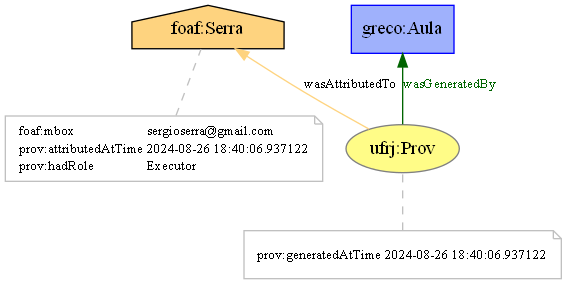

In [20]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image(graph)

---
#### &copy; Copyright 2021,2022, 2024 - Sergio Serra & Jorge Zavaleta